# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        request_json = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = request_json['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = request_json['coord']['lat']
        city_lng = request_json['coord']['lon']
        city_max_temp = request_json['main']['temp_max']
        city_humidity = request_json['main']['humidity']
        city_clouds = request_json['clouds']['all']
        city_wind = request_json['wind']['speed']
        city_country = request_json['sys']['country']
        city_date = time.strftime('%d/%m/%Y', time.localtime(request_json['dt']))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | afif
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | nurmes
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | beau vallon
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | el-tor
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | gaiman
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | klyuchi
Processing Record 23 of Set 1 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marechal floriano,-20.4128,-40.6831,20.14,98,21,1.42,BR,11/05/2024
1,baker city,44.7749,-117.8344,14.25,83,0,1.54,US,11/05/2024
2,adamstown,-25.0660,-130.1015,21.81,79,99,5.63,PN,11/05/2024
3,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,11/05/2024
4,tolanaro,-25.0319,46.9987,26.86,61,0,6.57,MG,11/05/2024


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marechal floriano,-20.4128,-40.6831,20.14,98,21,1.42,BR,11/05/2024
1,baker city,44.7749,-117.8344,14.25,83,0,1.54,US,11/05/2024
2,adamstown,-25.0660,-130.1015,21.81,79,99,5.63,PN,11/05/2024
3,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,11/05/2024
4,tolanaro,-25.0319,46.9987,26.86,61,0,6.57,MG,11/05/2024


In [24]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marechal floriano,-20.4128,-40.6831,20.14,98,21,1.42,BR,11/05/2024
1,baker city,44.7749,-117.8344,14.25,83,0,1.54,US,11/05/2024
2,adamstown,-25.0660,-130.1015,21.81,79,99,5.63,PN,11/05/2024
3,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,11/05/2024
4,tolanaro,-25.0319,46.9987,26.86,61,0,6.57,MG,11/05/2024
...,...,...,...,...,...,...,...,...,...
565,dalandzadgad,43.5708,104.4250,20.01,10,17,6.21,MN,11/05/2024
566,kita,13.0349,-9.4895,36.59,25,33,4.00,ML,11/05/2024
567,livny,52.4253,37.6069,10.49,70,81,6.74,RU,11/05/2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

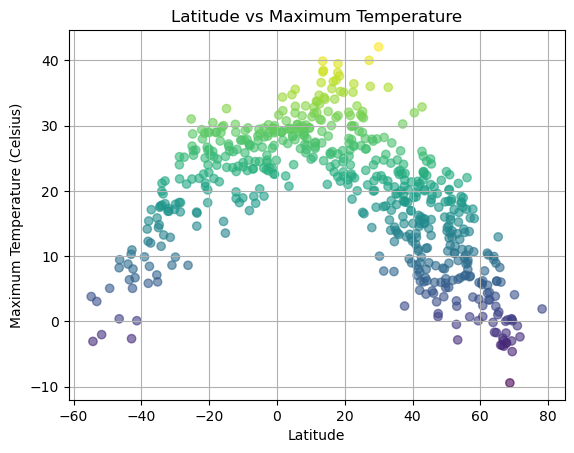

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.6, c=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.ylabel("Maximum Temperature (Celsius)") 
plt.xlabel("Latitude")
plt.title("Latitude vs Maximum Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

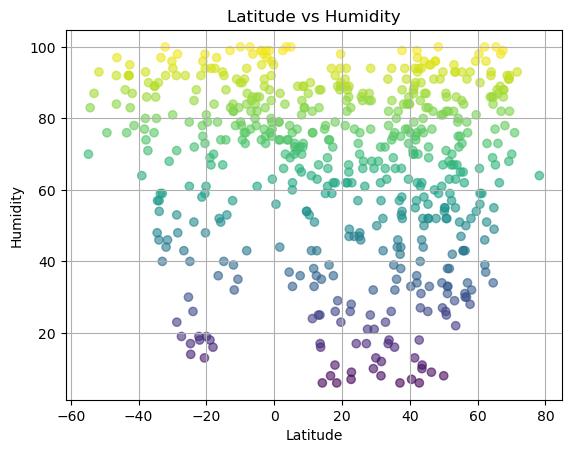

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.6, c=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.ylabel("Humidity") 
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

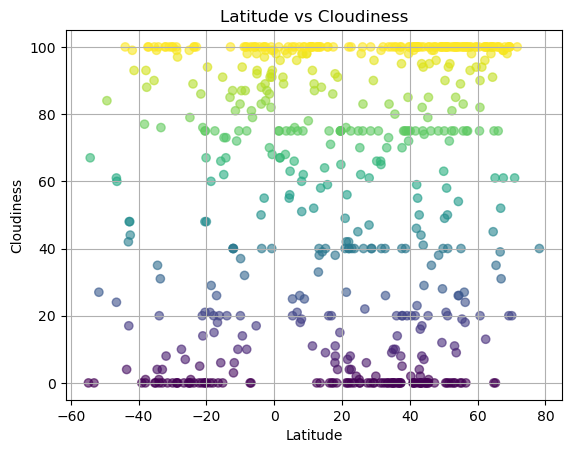

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.6, c=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.ylabel("Cloudiness") 
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

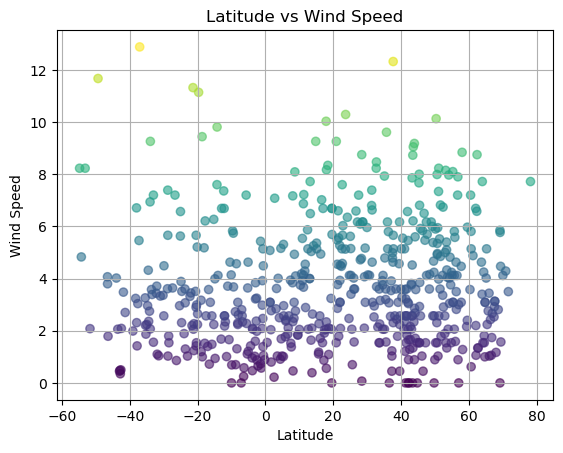

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.6, c=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.ylabel("Wind Speed") 
plt.xlabel("Latitude")
plt.title("Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def reg_plot(x, y, xlabel, ylabel, title, alpha = 0.6):
    # Define slope and intercept to draw linear line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Plot scatterplot
    plt.scatter(x, y, alpha=alpha)

    # Define linear line
    estimated_y = intercept + slope * x
    plt.plot(x, estimated_y, c='red')

    # Labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

    return None

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df[northern_hemi_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,baker city,44.7749,-117.8344,14.25,83,0,1.54,US,11/05/2024
5,pingyi,35.5006,117.6308,24.73,16,100,3.20,CN,11/05/2024
7,atherton,53.5237,-2.4935,21.14,63,85,1.34,GB,11/05/2024
8,kodiak,57.7900,-152.4072,3.73,93,100,3.09,US,11/05/2024
9,ilulissat,69.2167,-51.1000,-2.99,68,20,0.00,GL,11/05/2024


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df[southern_hemi_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marechal floriano,-20.4128,-40.6831,20.14,98,21,1.42,BR,11/05/2024
2,adamstown,-25.0660,-130.1015,21.81,79,99,5.63,PN,11/05/2024
3,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,11/05/2024
4,tolanaro,-25.0319,46.9987,26.86,61,0,6.57,MG,11/05/2024
6,beau vallon,-20.4189,57.6953,26.23,73,75,5.66,MU,11/05/2024


###  Temperature vs. Latitude Linear Regression Plot

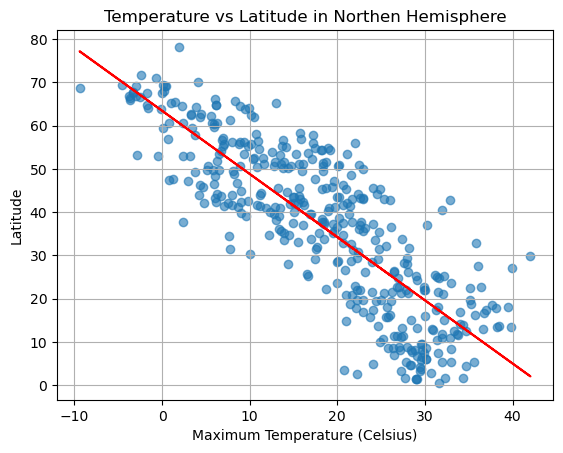

In [43]:
# Linear regression on Northern Hemisphere
reg_plot(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'], 'Maximum Temperature (Celsius)',
         'Latitude', title="Temperature vs Latitude in Northen Hemisphere")

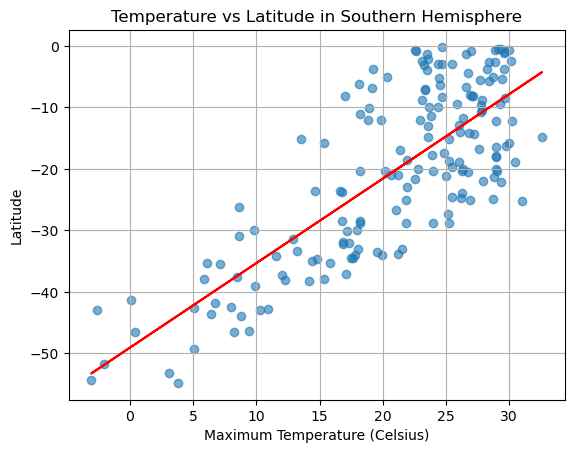

In [46]:
# Linear regression on Southern Hemisphere
reg_plot(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'], 'Maximum Temperature (Celsius)',
         'Latitude', title="Temperature vs Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** As the latitude of the Northern Hemisphere increases from 0 degrees latitude to 90 degrees North the maximum temperature decreases.  As the latitude of the Southern Hemisphere decreases from 0 degrees to -60 degrees South, the maximum temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

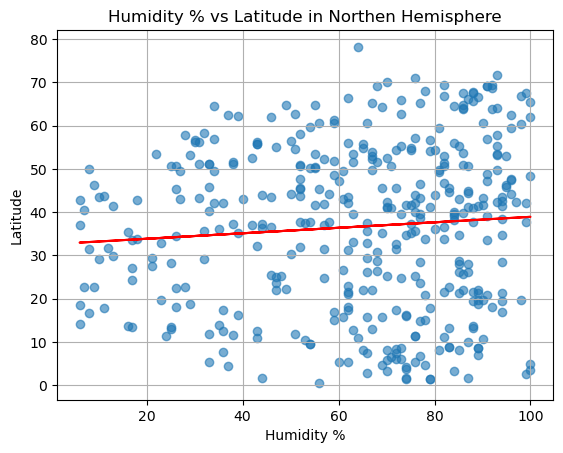

In [53]:
# Northern Hemisphere
reg_plot(northern_hemi_df['Humidity'], northern_hemi_df['Lat'], 'Humidity %',
         'Latitude', title="Humidity % vs Latitude in Northen Hemisphere")

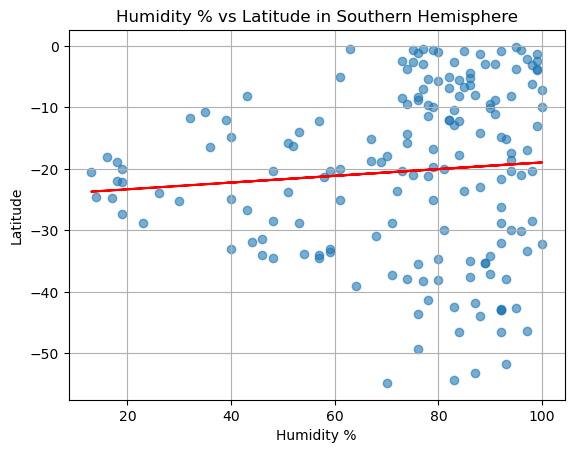

In [52]:
# Southern Hemisphere
reg_plot(southern_hemi_df['Humidity'], southern_hemi_df['Lat'], 'Humidity %',
         'Latitude', title="Humidity % vs Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** There is a weak realtionship between humidity and latitude in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

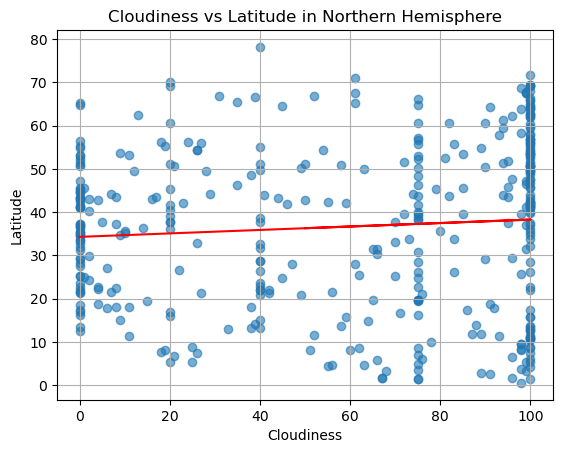

In [56]:
# Northern Hemisphere
reg_plot(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'], 'Cloudiness',
         'Latitude', title="Cloudiness vs Latitude in Northern Hemisphere")

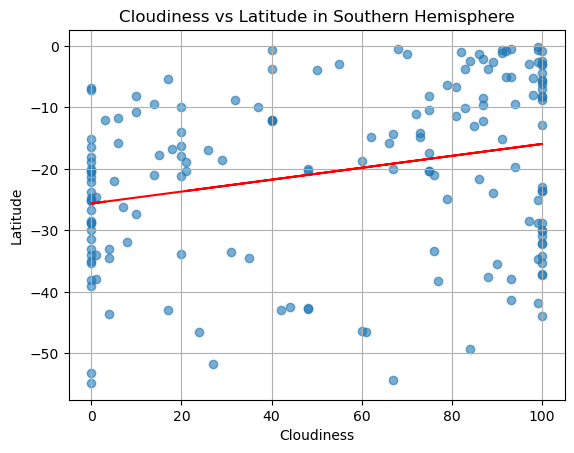

In [55]:
# Southern Hemisphere
reg_plot(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'], 'Cloudiness',
         'Latitude', title="Cloudiness vs Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** In the Southern Hemisphere there is a slightly stronger relationship between cloudiness and latitude than in the Northern Hemisphere.  However the relationship between cloudiness and latitude in both hemisphere appears quite weak.

### Wind Speed vs. Latitude Linear Regression Plot

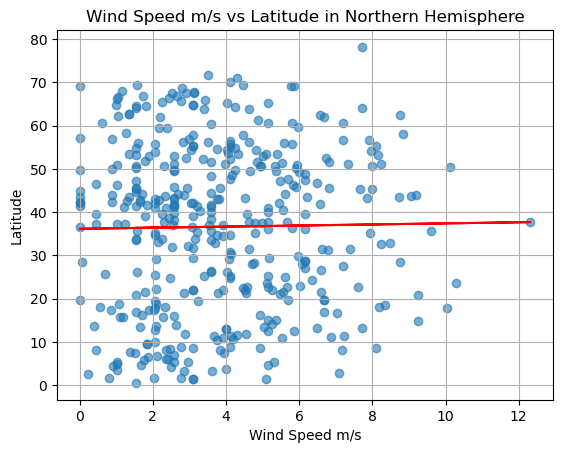

In [59]:
# Northern Hemisphere
reg_plot(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'], 'Wind Speed m/s',
         'Latitude', title="Wind Speed m/s vs Latitude in Northern Hemisphere")

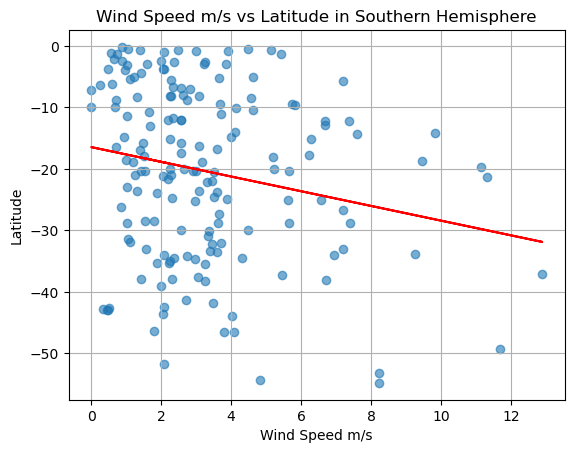

In [58]:
# Southern Hemisphere
reg_plot(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'], 'Wind Speed m/s',
         'Latitude', title="Wind Speed m/s vs Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere there is no relationship between wind speed and latitude, however in the Southern Hemisphere there appears to be a moderate relationship between wind speed and latitude.